<a href="https://colab.research.google.com/github/Suhyun77/ds-section1-project/blob/main/AI_06_%EA%B0%95%EC%88%98%ED%98%84_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **반드시 들어가야 하는 내용.**

*  지역별 선호하는 게임 장르
*  연도별 게임의 트렌드
*  출고량이 높은 게임에 대한 분석 및 시각화 프로세스

# **EDA_데이터 전처리**


*   'Publisher' feature drop
*   nan값 제거(Year, Genre)
*   year의 2자리수 년도 -> 4자리수 년도로 통일
*   판매량 단위 M(1백만)단위로 전부 통일


In [35]:
import pandas as pd
#data 불러오기
data = pd.read_csv("/content/vgames2.csv", index_col=0)
data0 = data.copy()
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [36]:
data['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
ITT Family Games                   1
Technos Japan Corporation          1
iWin                               1
Visco                              1
Havas Interactive                  1
Name: Publisher, Length: 578, dtype: int64

In [37]:
#'Publisher' feature drop
data.drop(columns='Publisher', inplace=True)
data

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,0.05,0.05,0.25,0.03


In [38]:
index1 = data.query('{0}.str.contains("The Munchables")'.format('Name'), engine='python').index
index1[0]

2

In [39]:
data.isnull().sum()
#321/16598 = 데이터의 약 1~2%

Name             0
Platform         0
Year           271
Genre           50
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [40]:
#nan값 제거(Year, Genre)
df = data.dropna(subset=['Year', 'Genre'])
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [41]:
#year의 2자리수 년도 -> 4자리수 년도로 통일
def year_transition(i):
      if i <= 20:
        i += 2000
        return i
      elif 80 <= i and i < 100:
        i += 1900
        return i
      else:
        return i

df['Year'] = df['Year'].apply(year_transition)
df['Year'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


array([2008., 2009., 2010., 2005., 2011., 2007., 2001., 2003., 2006.,
       2014., 2015., 2002., 1997., 2013., 1996., 2004., 2000., 1984.,
       1998., 2016., 1985., 1999., 1995., 1993., 2012., 1987., 1982.,
       1994., 1990., 1992., 1991., 1983., 1988., 1981., 1989., 1986.,
       2017., 1980., 2020.])

In [42]:
#판매량의 0M,0K -> 0
df.replace('0M', '0', inplace=True)
df.replace('0K', '0', inplace=True)

#확인
Sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for i in Sales:
    for s in df[i]:
      if s == '0M' or s == '0K':
          print(s)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [43]:
#판매량 단위 M(1백만)으로 전부 통일 & 수치화
def delete_MK(x):
    if "M" in x:
      return float(x.replace('M',''))
    elif "K" in x:
      return float(x.replace('K',''))/1000
    else:
      return float(x)

for s in Sales:
  df[s] = df[s].apply(delete_MK) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 1 to 16598
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   NA_Sales     16277 non-null  float64
 5   EU_Sales     16277 non-null  float64
 6   JP_Sales     16277 non-null  float64
 7   Other_Sales  16277 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


# **지역별 선호하는 게임 장르**





## 1) EDA 



In [44]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [45]:
#결측치 제거
df_genre = data.iloc[:, 3:]
df_genre.dropna(inplace=True)
df_genre.isnull().sum()

Genre          0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [46]:
#판매량의 0M,0K -> 0
df_genre.replace('0M', '0', inplace=True)
df_genre.replace('0K', '0', inplace=True)

#확인
Sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for i in Sales:
    for s in df_genre[i]:
      if s == '0M' or s == '0K':
          print(s)

#판매량 단위 M(1백만)으로 전부 통일& 수치화
def delete_MK(x):
    if "M" in x:
      return float(x.replace('M',''))
    elif "K" in x:
      return float(x.replace('K',''))/1000
    else:
      return float(x)

for s in Sales:
  df_genre[s] = df_genre[s].apply(delete_MK) 

df_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Action,0.04,0.00,0.00,0.00
2,Action,0.17,0.00,0.00,0.01
3,Adventure,0.00,0.00,0.02,0.00
4,Misc,0.04,0.00,0.00,0.00
5,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16594,Platform,0.15,0.04,0.00,0.01
16595,Action,0.01,0.00,0.00,0.00
16596,Sports,0.44,0.19,0.03,0.13
16597,Action,0.05,0.05,0.25,0.03


##2) ANOVA(one-way)
- 독립변수 = 장르(범주형)
- 종속변수 = 판매량(연속형)
- 귀무가설 : 각 지역별 장르에 따른 게임 판매량의 차이가 없다.
- 대립가설 : 각 지역별 장르에 따른 게임 판매량의 차이가 있다.(적어도 1개 집단의 평균은 같지 않다.)

In [47]:
#독립성 : 일반적으로 독립되어 있다라고 판단

#정규성 : stats.shapiro()

#등분산성: stats.levene(), stats.fligner(), stats.bartlett()

In [48]:
df_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Action,0.04,0.00,0.00,0.00
2,Action,0.17,0.00,0.00,0.01
3,Adventure,0.00,0.00,0.02,0.00
4,Misc,0.04,0.00,0.00,0.00
5,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16594,Platform,0.15,0.04,0.00,0.01
16595,Action,0.01,0.00,0.00,0.00
16596,Sports,0.44,0.19,0.03,0.13
16597,Action,0.05,0.05,0.25,0.03


In [49]:
columns = df_genre['Genre'].unique()
locals = Sales
crosstabs = []

for lc in locals:
    cro = pd.crosstab(index = df[lc], columns = df_genre['Genre'], values= df[lc], aggfunc='sum').fillna(0)
    crosstabs.append(cro)

for i in range(4):
    f = []
    for s in range(12):
        n = crosstabs[i].iloc[:, s]
        f.append(n.tolist())
    ANOVA = stats.f_oneway(f[0], f[1], f[2], f[3], f[4], f[5], f[6], f[7], f[8], f[9], f[10], f[11])
    print(ANOVA[1])

2.0147114360133808e-101
8.004781169853061e-91
4.420338612046553e-93
9.521933260565936e-54


각 지역마다 장르에 따른 게임 판매량의 ANOVA 분석 p-value는 전부 0.05보다 작다


**=  각 지역마다 장르에 따른 판매량에는 차이가 있다고 볼 수 있다.**

## 3) 지역별 선호하는 게임 장르

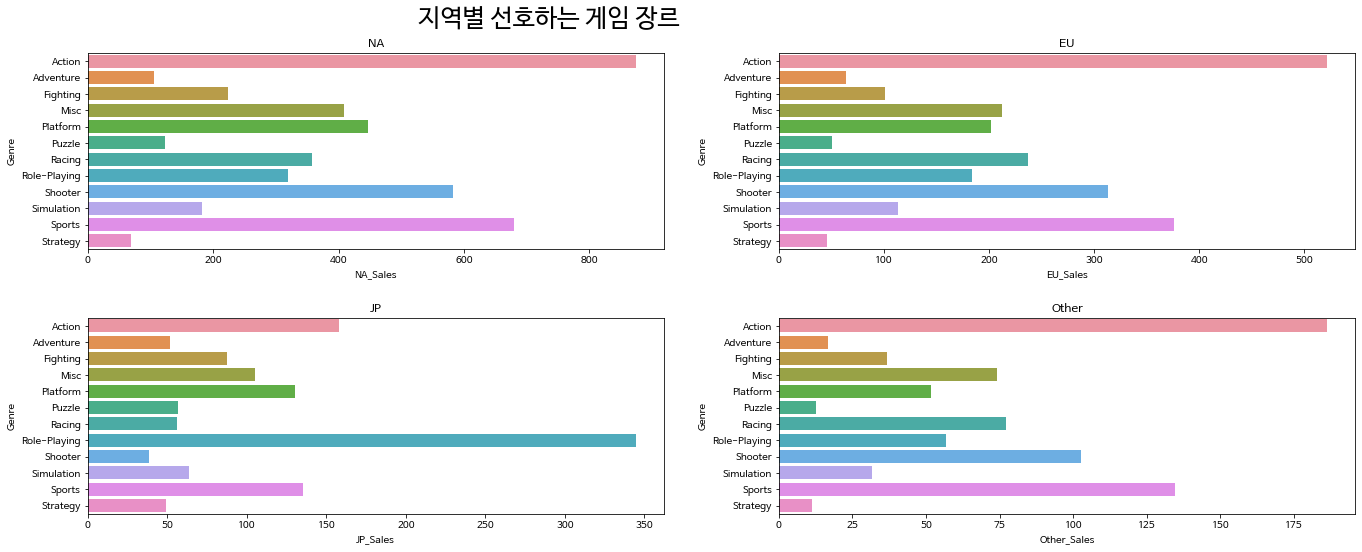

In [50]:
GenreGroup = df_genre.groupby('Genre')

NA = GenreGroup['NA_Sales'].sum().reset_index()
EU = GenreGroup['EU_Sales'].sum().reset_index()
JP = GenreGroup['JP_Sales'].sum().reset_index()
Other = GenreGroup['Other_Sales'].sum().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle('지역별 선호하는 게임 장르', fontsize= 25)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.2, hspace=0.35)

sns.barplot(ax=axes[0][0], data=NA, y='Genre', x='NA_Sales')
sns.barplot(ax=axes[0][1], data=EU, y='Genre', x='EU_Sales')
sns.barplot(ax=axes[1][0], data=JP, y='Genre', x='JP_Sales')
sns.barplot(ax=axes[1][1], data=Other, y='Genre', x='Other_Sales')

labels = [['NA', 'EU'], ['JP', 'Other']]

for x in range(2):
    for y in range(2):
        axes[x][y].set_title(labels[x][y])
       

**각 지역별 선호하는 게임 장르 TOP3**

*   NA(북미) : Action > Sports > Shooter
*   EU(유럽) : Action > Sports > Shooter
*   JP(일본) : Role-Playing > Action > Sports
*   Other(기타) : Action > Sports > Shooter



## **=> 일본은 Role-Playing을 가장 선호하지만 Action > Sports 장르도 선호하므로 전세계적으로 선호하는 게임 장르는 Action임을 알 수 있다.**

# **연도별 게임 트렌드**

## 1) EDA & Data Featuring

In [51]:
df = data.dropna(subset=['Year'])


#year의 2자리수 년도 -> 4자리수 년도로 통일
def year_transition(i):
      if i <= 20:
        i += 2000
        return i
      elif 80 <= i and i < 100:
        i += 1900
        return i
      else:
        return i

df['Year'] = df['Year'].apply(year_transition)
df['Year'].unique()


#판매량의 0M,0K -> 0
df.replace('0M', '0', inplace=True)
df.replace('0K', '0', inplace=True)

#확인
Sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for i in Sales:
    for s in df[i]:
      if s == '0M' or s == '0K':
          print(s)


#판매량 단위 M(1백만)으로 전부 통일 & 수치화
def delete_MK(x):
    if "M" in x:
      return float(x.replace('M',''))
    elif "K" in x:
      return float(x.replace('K',''))/1000
    else:
      return float(x)

for s in Sales:
  df[s] = df[s].apply(delete_MK) 

trend = df.copy()
trend

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,0.05,0.05,0.25,0.03


In [52]:
# Data Featuring
Trend = trend.iloc[:, 2:]
Trend.drop(columns='Genre', inplace=True)
Trend.isnull().sum()
Trend = Trend.groupby('Year').sum()

## 2) 연도별 지역에 따른 게임 전체 판매량 차이

In [53]:
Trend1 = Trend.copy()
Trend1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70
1985.0,33.73,4.74,14.56,0.92
1986.0,12.50,2.84,19.81,1.93
1987.0,8.46,1.41,11.63,0.20
1988.0,23.87,6.59,15.76,0.99


In [54]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Serif',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'cmex10',
 'cmmi10',
 'DejaVu Serif Display',
 'cmss10',
 'DejaVu Serif',
 'STIXSizeFiveSym',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmsy10',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'cmr10',
 'cmb10',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmtt10',
 'STIXNonUnicode',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumSquareRound',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'NanumMyeongjo',
 'Liberation Sans',
 'Humor Sans',
 'Liberation Sans',
 'Liberation Serif',
 'NanumSquareRound',
 'Liberation Sans',
 'Liberation Serif',
 'NanumGothic',
 'Li

In [55]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


Text(0.5, 1.0, '연도별 지역에 따른 게임 전체 판매량 차이')

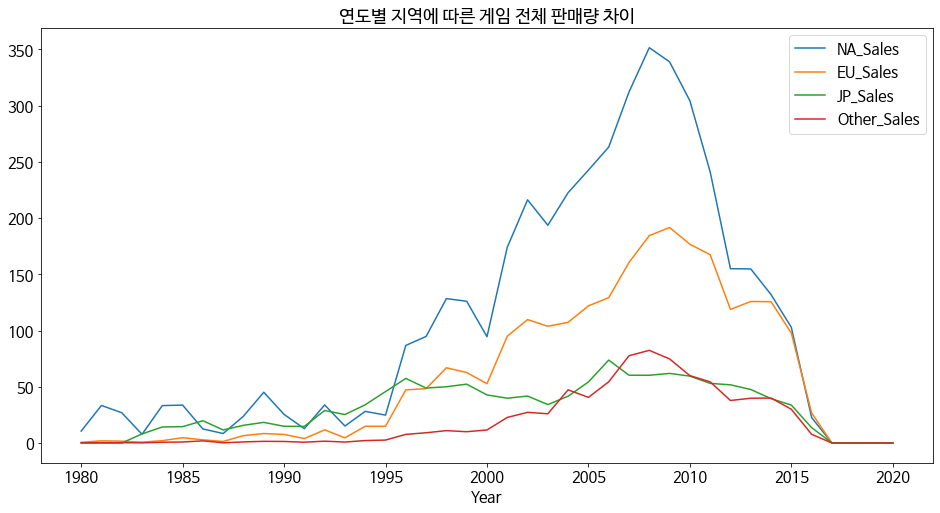

In [56]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['font.size'] = 15
sns.lineplot(data=Trend1, dashes=False)
plt.title('연도별 지역에 따른 게임 전체 판매량 차이')

**[분석 결과]**


연도별 지역에 따른 게임 전체 판매량 차이로 보아 대체적으로 2020년 전의 게임 전체 판매량 순위는 아래와 같다.

1.   **NA(북미)**
2.   **EU(유럽)**
3.   **JP(일본)**
4.   **Other(그 외 국가)**

그러나 **2017년~2020년 이후로는 지역에 따른 게임 전체 판매량 차이가 거의 없다.** 

## 3) 연도별 장르에 따른 게임 판매 비율 차이

In [57]:
# 전세계 판매금액 Feature 추가
Trend2 = trend.copy()
Total_Sales = []
for i in Trend2.index:
    T_sales = Trend2.loc[i, 'NA_Sales':'Other_Sales'].sum()
    Total_Sales.append(round(T_sales, 2))
Trend2['Total_Sales'] = Total_Sales
Trend2

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015.0,Sports,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,0.05,0.05,0.25,0.03,0.38


In [58]:
#Data Featuring
Trend2 = Trend2.loc[:, 'Year':'Total_Sales']
Trend2.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)

Trend2 = pd.crosstab(index=Trend2['Year'], columns=Trend2['Genre'], values=Trend2['Total_Sales'], aggfunc = 'sum').fillna(0)
Trend2


Year_Total = []
for i in Trend2.index:
    Y_Total = Trend2.loc[i, 'Action':'Strategy'].sum()
    Year_Total.append(Y_Total)
Trend2['Year_Total'] = Year_Total

Trend2_ratio = Trend2.copy()
col = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', 'Year_Total']

for i in Trend2_ratio.index:
    for s in col:
        Trend2_ratio.loc[i, s] = Trend2_ratio.loc[i, s] / Trend2_ratio.loc[i, 'Year_Total']
Trend2_ratio = Trend2_ratio.iloc[:, :-1]
Trend2_ratio

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,0.031250,0.000000,0.070772,0.248162,0.000000,0.000000,0.000000,0.000000,0.649816,0.000000,0.000000,0.000000
1981.0,0.414518,0.000000,0.000000,0.000000,0.193946,0.063061,0.013453,0.000000,0.280830,0.012332,0.021861,0.000000
1982.0,0.225069,0.000000,0.000000,0.030125,0.174169,0.347645,0.054363,0.000000,0.131925,0.000000,0.036704,0.000000
1983.0,0.170238,0.023810,0.000000,0.127381,0.412500,0.046429,0.000000,0.000000,0.029167,0.000000,0.190476,0.000000
1984.0,0.036743,0.000000,0.000000,0.028798,0.013704,0.062363,0.118173,0.000000,0.617676,0.000000,0.122542,0.000000
1985.0,0.065246,0.000000,0.019462,0.000000,0.800185,0.059500,0.000000,0.000000,0.018536,0.000741,0.036330,0.000000
1986.0,0.370550,0.000000,0.000000,0.000000,0.253236,0.000000,0.052859,0.067961,0.104908,0.000000,0.150485,0.000000
1987.0,0.051152,0.201843,0.249770,0.000000,0.080184,0.000000,0.000000,0.214286,0.031797,0.000000,0.170968,0.000000
1988.0,0.036857,0.000000,0.000000,0.000000,0.587376,0.118195,0.045329,0.124550,0.010803,0.000635,0.076255,0.000000


Text(0.5, 1.0, '연도별 장르에 따른 게임 판매 비율 차이')

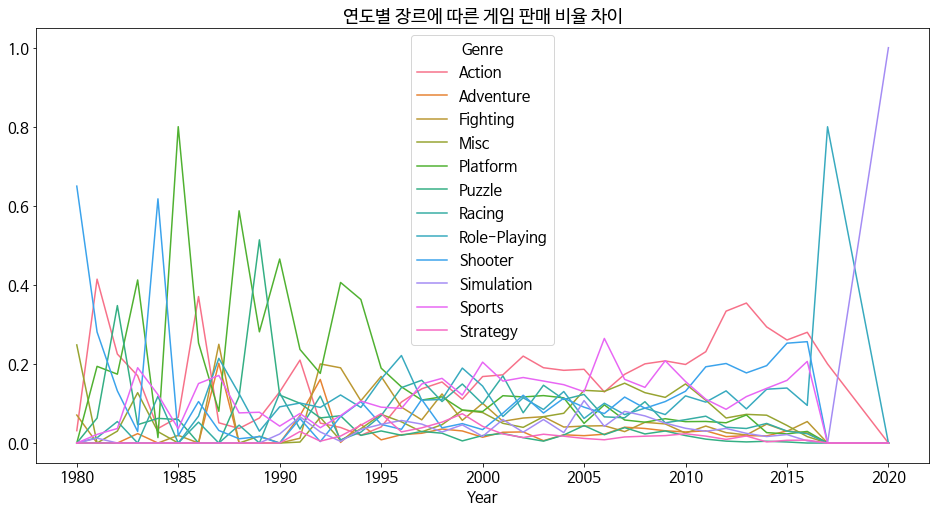

In [59]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 15
sns.lineplot(data = Trend2_ratio,  dashes = False)
plt.title('연도별 장르에 따른 게임 판매 비율 차이')

In [60]:
Trend2_re = Trend2.copy()
Trend2_re


r1 = Trend2_re.iloc[:5, :].sum()
r2 = Trend2_re.iloc[5:10, :].sum()
r3 = Trend2_re.iloc[10:15, :].sum()
r4 = Trend2_re.iloc[15:20, :].sum()
r5 = Trend2_re.iloc[20:25, :].sum()
r6 = Trend2_re.iloc[25:30, :].sum()
r7 = Trend2_re.iloc[30:35, :].sum()
r8 = Trend2_re.iloc[35:39, :].sum()


Year = ['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2020']

Trend2_re = pd.concat([r1, r2, r3, r4, r5, r6, r7, r8], axis=1, keys=Year)
Trend2_re = Trend2_re.T
Trend2_re


#연도별 비율로 전환
col = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', 'Year_Total']
for i in Trend2_re.index:
    for s in col:
        Trend2_re.loc[i, s] = Trend2_re.loc[i, s] / Trend2_re.loc[i, 'Year_Total']
Trend2_re = Trend2_re.iloc[:, :-1]
Trend2_re

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
1980-1984,0.184725,0.002805,0.005400,0.050214,0.137247,0.113683,0.056105,0.000000,0.368118,0.003086,0.078617,0.000000
1985-1989,0.106089,0.018767,0.027722,0.005484,0.439993,0.199409,0.017567,0.065341,0.031192,0.000300,0.088136,0.000000
1990-1994,0.071921,0.064640,0.116063,0.028910,0.323237,0.066337,0.067079,0.096696,0.048242,0.029440,0.067362,0.020074
1995-1999,0.119729,0.026717,0.091379,0.055682,0.118328,0.020328,0.130845,0.156625,0.055672,0.044052,0.128406,0.052235
2000-2004,0.189566,0.019903,0.061250,0.060477,0.112961,0.016057,0.120205,0.106413,0.090432,0.038833,0.162277,0.021626
2005-2009,0.181798,0.030778,0.043564,0.131181,0.063122,0.030987,0.080075,0.079248,0.095774,0.068308,0.180410,0.014755
2010-2014,0.269328,0.023643,0.032373,0.100264,0.052158,0.009494,0.052825,0.114895,0.175228,0.030095,0.124195,0.015501
2015-2020,0.264563,0.029486,0.034921,0.038464,0.024411,0.002072,0.028795,0.129774,0.253093,0.018887,0.168508,0.007026


Text(0.5, 1.0, '연도별 장르에 따른 게임 판매 비율 차이(5년 주기)')

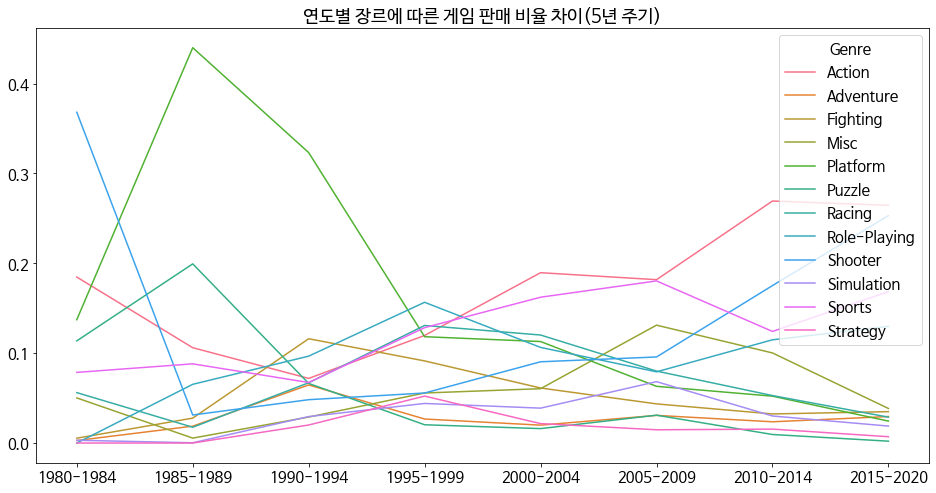

In [61]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 15
sns.lineplot(data = Trend2_re,  dashes = False)
plt.title('연도별 장르에 따른 게임 판매 비율 차이(5년 주기)')

**[분석 결과]**


*   1980 - 1984 : 'Shooter'장르가 트렌드였지만 점점 하락하는 추세
*   1985 - 1995 : 'Platform'장르가 트렌드의 정점을 찍은 후 하락하는 추세
*   1990 - 2009 : 'Platform'장르가 하락하는 동시에 'Action'과 'Sports'장르가 상승
*   2005 - 2020 : 'Action'장르는 계속해서 상승하는데 반해 'Sports'의 인기는 대폭 하락후 다시 상승하고 'Shooter'장르가 다시 급 상승

###=> 가장 최근 년도를 보았을 때 **'게임 장르 트렌드'는 'Action'과 'Shooter'이다.**

## 4) 연도별 플랫폼에 따른 게임 판매 비율 차이

In [62]:
#Data Featuring
Trend3 = trend.copy()
Total_Sales = []
for i in Trend3.index:
    T_sales = Trend3.loc[i, 'NA_Sales':'Other_Sales'].sum()
    Total_Sales.append(T_sales)
Trend3['Total_Sales'] = Total_Sales

Trend3 = Trend3.loc[:, 'Platform':'Total_Sales']
Trend3.drop(['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)

Trend3 = pd.crosstab(index=Trend3['Year'], columns=Trend3['Platform'], values=Trend3['Total_Sales'], aggfunc = 'sum').fillna(0)

Year_Total = []
for i in Trend3.index:
    Y_Total = Trend3.loc[i, '2600':'XOne'].sum()
    Year_Total.append(Y_Total)
Trend3['Year_Total'] = Year_Total


r1 = Trend3.iloc[:5, :].sum()
r2 = Trend3.iloc[5:10, :].sum()
r3 = Trend3.iloc[10:15, :].sum()
r4 = Trend3.iloc[15:20, :].sum()
r5 = Trend3.iloc[20:25, :].sum()
r6 = Trend3.iloc[25:30, :].sum()
r7 = Trend3.iloc[30:35, :].sum()
r8 = Trend3.iloc[35:39, :].sum()


Year = ['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2020']

Trend3 = pd.concat([r1, r2, r3, r4, r5, r6, r7, r8], axis=1, keys=Year)
Trend3 = Trend3.T
Trend3

#연도별 비율로 전환
col = Trend3.columns
for i in Trend3.index:
    for s in col:
        Trend3.loc[i, s] = Trend3.loc[i, s] / Trend3.loc[i, 'Year_Total']
Trend3 = Trend3.iloc[:, :-1]
Trend3 = Trend3.loc[:, ['2600', 'DS', 'NES', 'SNES', 'PS', 'PS2', 'Wii', 'X360', 'PS3', 'PS4']]
Trend3

Platform,2600,DS,NES,SNES,PS,PS2,Wii,X360,PS3,PS4
1980-1984,0.573415,0.000000,0.426585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1985-1989,0.018981,0.000086,0.696131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1990-1994,0.000000,0.000000,0.097332,0.531719,0.021311,0.000000,0.000000,0.000000,0.000000,0.000000
1995-1999,0.000000,0.000000,0.000000,0.049800,0.583312,0.000000,0.000000,0.000000,0.000000,0.000000
2000-2004,0.000000,0.010214,0.000000,0.000000,0.082532,0.473497,0.000000,0.000000,0.000000,0.000000
2005-2009,0.000000,0.228481,0.000000,0.000000,0.000000,0.143180,0.230572,0.140540,0.118217,0.000000
2010-2014,0.000000,0.059235,0.000000,0.000000,0.000000,0.002788,0.105595,0.248477,0.266196,0.056571
2015-2020,0.000000,0.000864,0.000000,0.000000,0.000000,0.000000,0.004650,0.041285,0.061883,0.460757


Text(0.5, 1.0, '연도별 플랫폼에 따른 게임 판매 비율 차이(상위 플랫폼)')

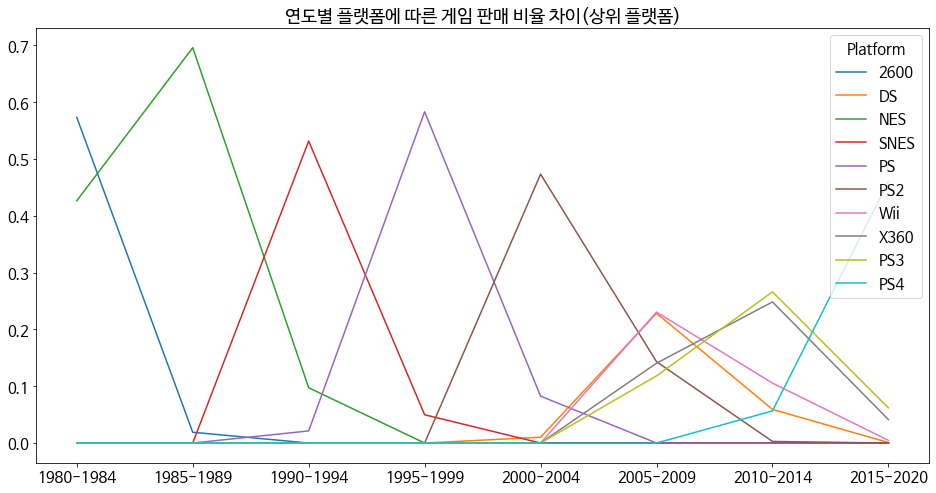

In [63]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 15
sns.lineplot(data = Trend3,  dashes = False)
plt.title('연도별 플랫폼에 따른 게임 판매 비율 차이(상위 플랫폼)')

**[분석 결과]**

### 2600 -> NES -> SNES -> PS -> PS2 -> DS & Wii -> PS3 & X360 -> PS4

1980년부터 2020년까지 위와 같은 순으로 게임 플랫폼의 트렌드가 변화하였으며 플랫폼 트렌드의 경우 대체적으로 **새로운 플랫폼이 출시되며 이전 플랫폼의 트렌드를 대체하는 경향**을 보였다.
###=> 가장 최근 년도를 보았을 때 **'게임 플랫폼 트렌드'는 'PS4'이다.**






# **출고량이 높은 게임**

## 1) EDA & Data Featuring

In [64]:
Top = data0.copy()
#year의 2자리수 년도 -> 4자리수 년도로 통일
def year_transition(i):
      if i <= 20:
        i += 2000
        return i
      elif 80 <= i and i < 100:
        i += 1900
        return i
      else:
        return i

Top['Year'] = Top['Year'].apply(year_transition)
Top['Year'].unique()


#판매량의 0M,0K -> 0
Top.replace('0M', '0', inplace=True)
Top.replace('0K', '0', inplace=True)

#확인
Sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for i in Sales:
    for s in Top[i]:
      if s == '0M' or s == '0K':
          print(s)


#판매량 단위 M(1백만)으로 전부 통일 & 수치화
def delete_MK(x):
    if "M" in x:
      return float(x.replace('M',''))
    elif "K" in x:
      return float(x.replace('K',''))/1000
    else:
      return float(x)

for s in Sales:
  Top[s] = Top[s].apply(delete_MK)


# 전세계 총 판매금액 Feature 추가
Total_Sales = []
for i in Top.index:
    T_sales = Top.loc[i, 'NA_Sales':'Other_Sales'].sum()
    Total_Sales.append(T_sales)
Top['Total_Sales'] = Total_Sales
Top

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


## 2) 역대 판매량 TOP20 게임

In [65]:
# 순위별 정렬
Top1 = Top.copy()
Top1.sort_values(by=['Total_Sales'], axis=0, ascending=False, inplace=True)
Top1 = Top1.reset_index(drop=True).head(20)
rank = [str(x)+' 위' for x in range(1, 21)]
Top1['rank'] = rank
Top1.drop(Sales, axis=1, inplace=True)
Top1

,Name,Platform,Year,Genre,Publisher,Total_Sales,rank
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74,1 위
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,2 위
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.83,3 위
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00,4 위
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.38,5 위
5,Tetris,GB,1989.0,Puzzle,Nintendo,30.26,6 위
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01,7 위
7,Wii Play,Wii,2006.0,Misc,Nintendo,29.01,8 위
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.61,9 위
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,28.31,10 위


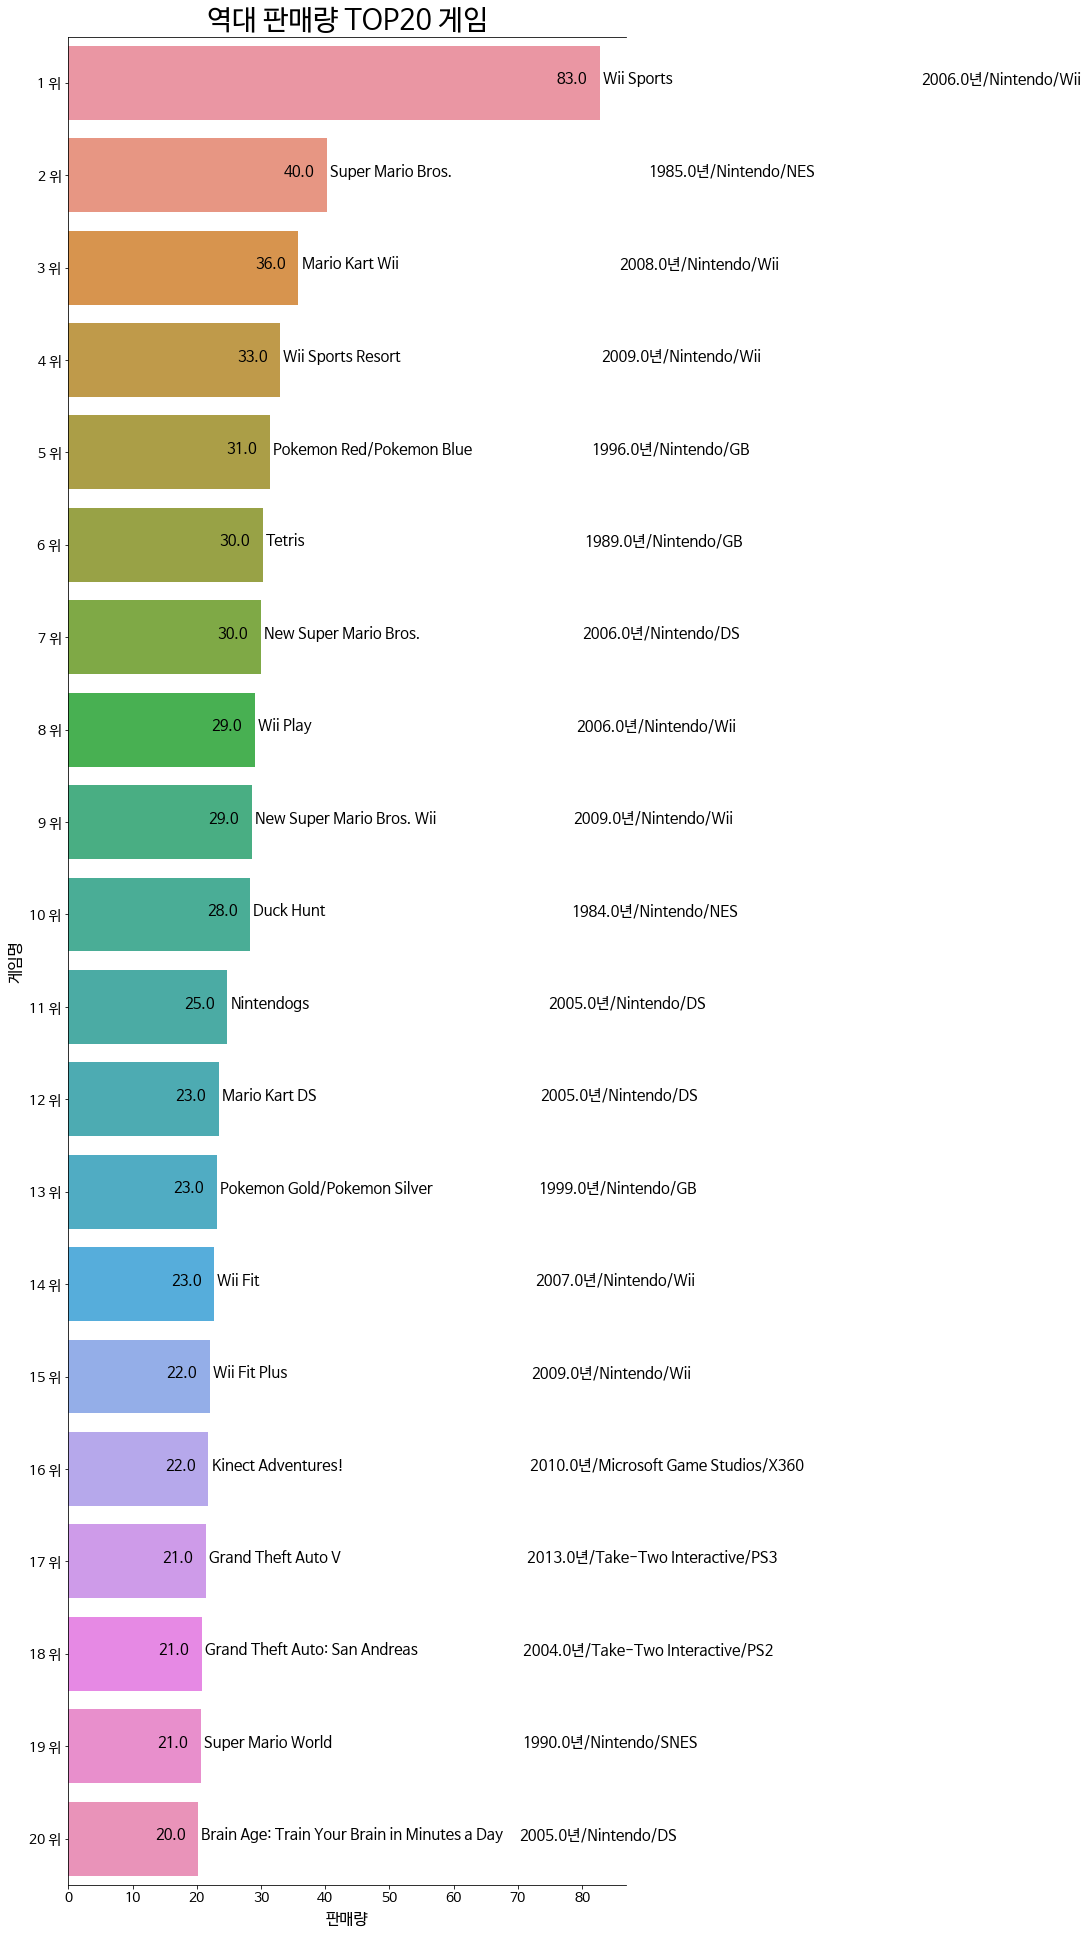

In [66]:
plt.rcParams['figure.figsize'] = [10, 34]
a = sns.barplot(x='Total_Sales', y='rank', data=Top1)
i = 0
for name, year, val, platform, publisher in zip(Top1.Name, Top1.Year, Top1.Total_Sales, Top1.Platform, Top1.Publisher):
    a.text(y=i, x=val+0.5, s=(name), color='black', ha='left', fontsize=15)
    a.text(y=i, x=val-2, s=(round(val,0)), color='black', ha='right', fontsize=15)
    a.text(y=i, x=val+50, s=(str(year) + '년' + '/' + publisher + '/' + platform), color='black', ha='left', fontsize=15)
    i+=1
a.set_title('역대 판매량 TOP20 게임', fontsize=28)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('게임명', fontsize=16)
plt.xlabel('판매량', fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.show()

**[분석 결과]**


## => 역대 판매량 TOP20 게임을 비교해보니, **시리즈물의 비율이 단편보다 많음을 알 수 있다.(마리오, 포켓몬, GTA)**



## 3) 최근 10년 판매량 TOP20 게임

In [67]:
Top2 = Top.copy()
Top2.dropna(subset=['Year'], inplace=True)
Top2 = Top2[Top2.Year >= 2011].sort_values(by=['Total_Sales'], axis=0, ascending=False)
Top2 = Top2.reset_index(drop=True).head(20)
rank = [str(x)+' 위' for x in range(1, 21)]
Top2['rank'] = rank
Top2.drop(Sales, axis=1, inplace=True)
Top2

,Name,Platform,Year,Genre,Publisher,Total_Sales,rank
0,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,21.39,1 위
1,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,16.38,2 위
2,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,14.76,3 위
3,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,14.35,4 위
4,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,14.24,5 위
5,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,14.04,6 위
6,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,13.74,7 위
7,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,13.47,8 위
8,Mario Kart 7,3DS,2011.0,Racing,Nintendo,12.21,9 위
9,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,11.99,10 위


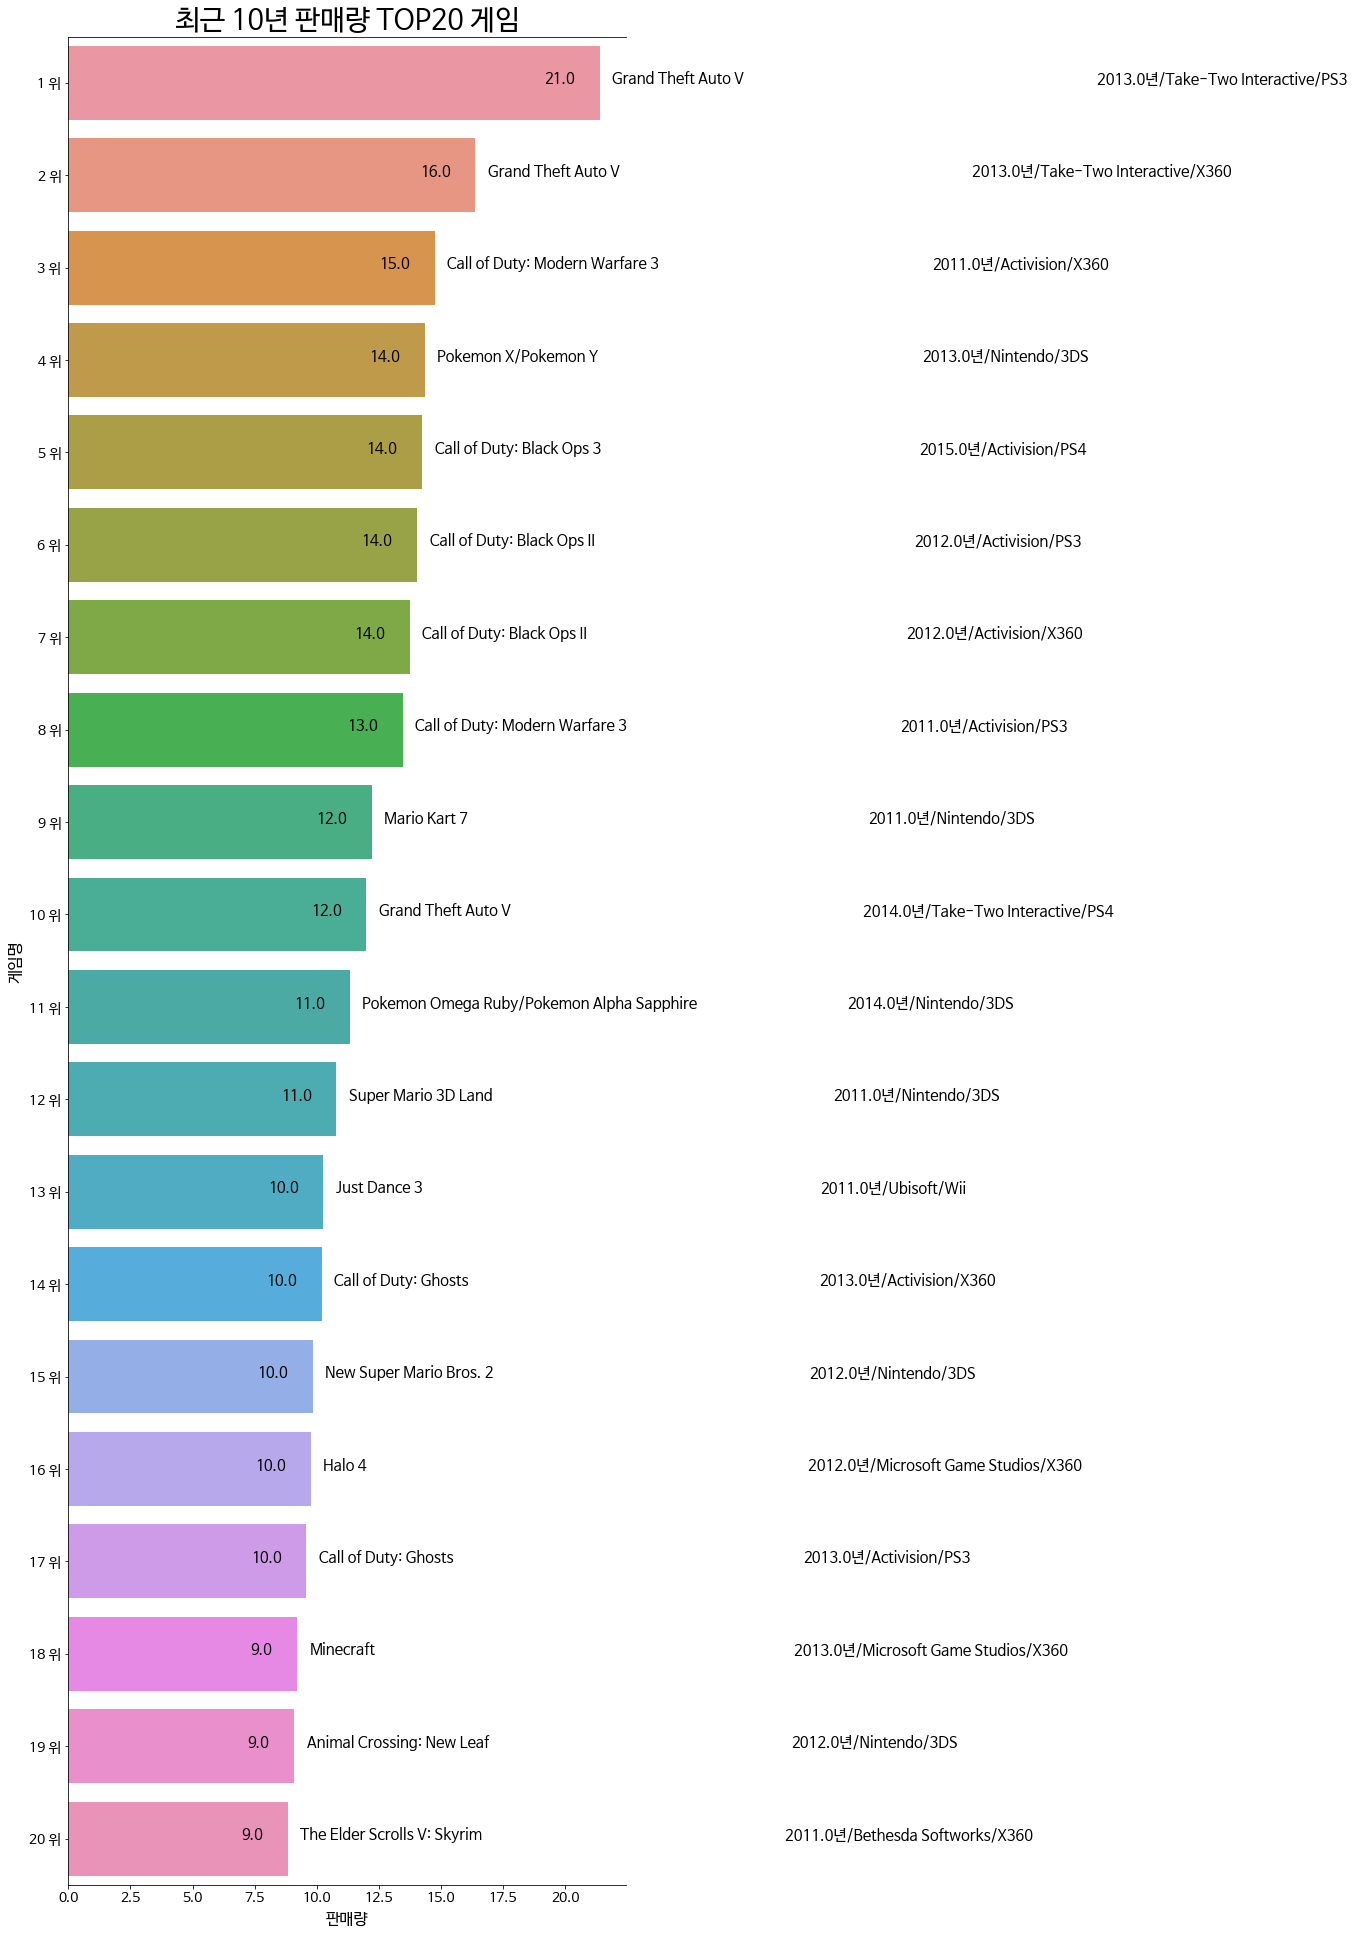

In [68]:
plt.rcParams['figure.figsize'] = [10, 34]
a = sns.barplot(x='Total_Sales', y='rank', data=Top2)
i = 0
for name, year, val, platform, publisher in zip(Top2.Name, Top2.Year, Top2.Total_Sales, Top2.Platform, Top2.Publisher):
    a.text(y=i, x=val+0.5, s=(name), color='black', ha='left', fontsize=15)
    a.text(y=i, x=val-1, s=(round(val,0)), color='black', ha='right', fontsize=15)
    a.text(y=i, x=val+20, s=(str(year) + '년' + '/' + publisher + '/' + platform), color='black', ha='left', fontsize=15)
    i+=1
a.set_title('최근 10년 판매량 TOP20 게임', fontsize=28)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('게임명', fontsize=16)
plt.xlabel('판매량', fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.show()

**[분석 결과]**
## => 앞서 분석한 '역대 판매량 TOP20 게임'과 마찬가지로 **2011년~2020년(최근 10년)의 TOP20 게임 데이터** 또한 거의 대부분이 **시리즈 게임**임을 알 수 있다.

# **결론**

## **다음 분기에 어떤 게임을 설계해야 할까?**

=> 플레이스테이션을 플랫폼으로 한 액션 장르의 시리즈물을 설계하는 것이 좋다.